## Description:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers.

It is required to understand the impact of ad budgets on the overall sales.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Advertising Budget and Sales.csv')

In [123]:
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5



#### analyze ROI

budgets are measured in thousands of dollars, and sales  in millions </p>


In [124]:
df['Total Ad Budget'] = df['TV Ad Budget ($)'] + df['Radio Ad Budget ($)'] + df['Newspaper Ad Budget ($)']
df['ROI'] = (df['Sales ($)']*1000 - df['Total Ad Budget']) / (df['Total Ad Budget'] *  1000)* 100
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Total Ad Budget,ROI
0,1,230.1,37.8,69.2,22.1,337.1,6.455918
1,2,44.5,39.3,45.1,10.4,128.9,7.968270
2,3,17.2,45.9,69.3,9.3,132.4,6.924169
3,4,151.5,41.3,58.5,18.5,251.3,7.261719
4,5,180.8,10.8,58.4,12.9,250.0,5.060000


In [125]:
bins = [ 0,5,6,7,8,9,10,11,100] 
df['ROI_Category'] = pd.cut(df['ROI'], bins )
df.groupby('ROI_Category')['ROI'].count()

ROI_Category
(0, 5]       19
(5, 6]       24
(6, 7]       46
(7, 8]       45
(8, 9]       25
(9, 10]      10
(10, 11]     12
(11, 100]    19
Name: ROI, dtype: int64

In [126]:
df.groupby('ROI_Category')[['ROI','Total Ad Budget','TV Ad Budget ($)',	'Radio Ad Budget ($)',	'Newspaper Ad Budget ($)']].mean()

,ROI,Total Ad Budget,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
ROI_Category,,,,,
"(0, 5]",4.369054,269.436842,231.210526,7.621053,30.605263
"(5, 6]",5.500988,267.612500,204.595833,20.079167,42.937500
"(6, 7]",6.517429,252.206522,190.067391,25.417391,36.721739
"(7, 8]",7.454541,212.542222,145.457778,31.251111,35.833333
"(8, 9]",8.579340,158.400000,113.276000,24.740000,20.384000
"(9, 10]",9.430501,130.580000,84.870000,25.910000,19.800000
"(10, 11]",10.477334,90.233333,54.033333,17.366667,18.833333
"(11, 100]",14.200709,58.715789,25.657895,19.189474,13.868421


In [127]:
def assign_category(roi):
    if roi > 10:
        return 'High  ROI'
    elif roi > 6.5:
        return 'Average  ROI'
    else:
        return 'Low ROI'

In [128]:
df['ROI_Category_2'] = df['ROI'].apply(assign_category)

In [129]:
df['TV (%)'] = df['TV Ad Budget ($)'] / df['Total Ad Budget']
df['Radio (%)'] = df['Radio Ad Budget ($)'] / df['Total Ad Budget']
df['Newspaper (%)'] = df['Newspaper Ad Budget ($)'] / df['Total Ad Budget']
df.head()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($),Total Ad Budget,ROI,ROI_Category,ROI_Category_2,TV (%),Radio (%),Newspaper (%)
0,1,230.1,37.8,69.2,22.1,337.1,6.455918,"(6, 7]",Low ROI,0.682587,0.112133,0.205280
1,2,44.5,39.3,45.1,10.4,128.9,7.968270,"(7, 8]",Average ROI,0.345229,0.304888,0.349884
2,3,17.2,45.9,69.3,9.3,132.4,6.924169,"(6, 7]",Average ROI,0.129909,0.346677,0.523414
3,4,151.5,41.3,58.5,18.5,251.3,7.261719,"(7, 8]",Average ROI,0.602865,0.164345,0.232789
4,5,180.8,10.8,58.4,12.9,250.0,5.060000,"(5, 6]",Low ROI,0.723200,0.043200,0.233600


find the percentage distribution of the advertising budget

In [130]:

def assign_budget_category(budget_percent):
    if budget_percent > 0.8:
        return '80_100'
    elif budget_percent > 0.6:
        return '60_80'
    elif budget_percent > 0.4:
        return '40_60'
    elif budget_percent > 0.2:
        return '20-40'
    elif budget_percent > 0.1:
        return '10-20'
    else:
        return '0_10'


In [131]:
df['TV_Category'] = df['TV (%)'].apply(assign_budget_category)
df['Radio_Category'] = df['Radio (%)'].apply(assign_budget_category)
df['Newspaper_Category'] = df['Newspaper (%)'].apply(assign_budget_category)

In [132]:
res = df.groupby(['ROI_Category_2', 'TV_Category', 'Radio_Category', 'Newspaper_Category'])[['ROI']].mean()
res=res.reset_index()
res

,ROI_Category_2,TV_Category,Radio_Category,Newspaper_Category,ROI
0,Average ROI,0_10,20-40,40_60,6.872302
1,Average ROI,10-20,20-40,40_60,7.292827
2,Average ROI,10-20,20-40,60_80,7.015629
3,Average ROI,20-40,20-40,20-40,7.968270
4,Average ROI,20-40,20-40,40_60,8.029287
5,Average ROI,40_60,10-20,20-40,7.923872
6,Average ROI,40_60,20-40,20-40,8.432102
7,Average ROI,60_80,0_10,10-20,6.874975
8,Average ROI,60_80,0_10,20-40,7.968536
9,Average ROI,60_80,10-20,0_10,8.191541


In [133]:
df.groupby(['ROI_Category_2'])[['TV (%)', 'Radio (%)', 'Newspaper (%)']].mean()

,TV (%),Radio (%),Newspaper (%)
ROI_Category_2,,,
Average ROI,0.673801,0.147177,0.179021
High ROI,0.489279,0.269005,0.241716
Low ROI,0.773481,0.077747,0.148772


In [134]:
res_2=df.groupby(['ROI_Category'])[['TV (%)', 'Radio (%)', 'Newspaper (%)']].mean()
res_2

,TV (%),Radio (%),Newspaper (%)
ROI_Category,,,
"(0, 5]",0.823116,0.061721,0.115163
"(5, 6]",0.740230,0.082924,0.176846
"(6, 7]",0.742032,0.102886,0.155083
"(7, 8]",0.639293,0.153414,0.207293
"(8, 9]",0.705094,0.145856,0.149050
"(9, 10]",0.651757,0.184493,0.163751
"(10, 11]",0.589874,0.191878,0.218248
"(11, 100]",0.425745,0.317717,0.256538


Сreate a diagram that will show what the ratio of the advertising budget spent on TV, radio and newspapers was, depending on the size of the swarm

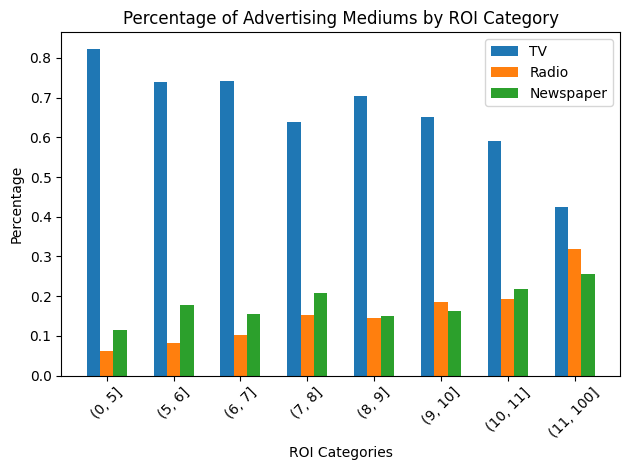

In [135]:
bar_width = 0.2
index = range(len(res_2.index))

plt.bar(index, res_2['TV (%)'], bar_width, label='TV')
plt.bar([i + bar_width for i in index], res_2['Radio (%)'], bar_width, label='Radio')
plt.bar([i + bar_width * 2 for i in index], res_2['Newspaper (%)'], bar_width, label='Newspaper')

plt.xlabel('ROI Categories')
plt.xticks([i + bar_width for i in index], res_2.index, rotation=45)
plt.legend()
plt.ylabel('Percentage')
plt.title('Percentage of Advertising Mediums by ROI Category')

plt.tight_layout()
plt.show()


We can notice that with an increase in the percentage of advertising on radio and newspapers, the ROI increases. Accordingly, we should distribute advertising budgets more evenly in all 3 categories in order to maximize ROI